In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from prettytable import PrettyTable

In [2]:
# Load dataset
filename = 'advertising.csv'
df = pd.read_csv(filename)
df.head()


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
# Define predictors and response
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [4]:
# Ridge Regression with cross-validation
alphas = np.logspace(-3, 3, 100)  # Candidate alpha values for regularization
ridge_cv = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error', cv=5)  # 5-fold CV
ridge_cv.fit(X_train, y_train)

# Predict on test set
y_pred_ridge = ridge_cv.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)


In [6]:
# Lasso Regression with cross-validation
lasso_cv = LassoCV(cv=5, max_iter=10000)  # Automatically selects best alpha
lasso_cv.fit(X_train, y_train)

# Predict on test set
y_pred_lasso = lasso_cv.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

In [7]:
# Display results in a table
t = PrettyTable(['Model', 'Best Alpha', 'MSE'])
t.add_row(['Ridge', round(ridge_cv.alpha_, 3), round(mse_ridge, 3)])
t.add_row(['Lasso', round(lasso_cv.alpha_, 3), round(mse_lasso, 3)])
print(t)

+-------+------------+-------+
| Model | Best Alpha |  MSE  |
+-------+------------+-------+
| Ridge |   0.001    | 4.402 |
| Lasso |   1.642    | 4.307 |
+-------+------------+-------+


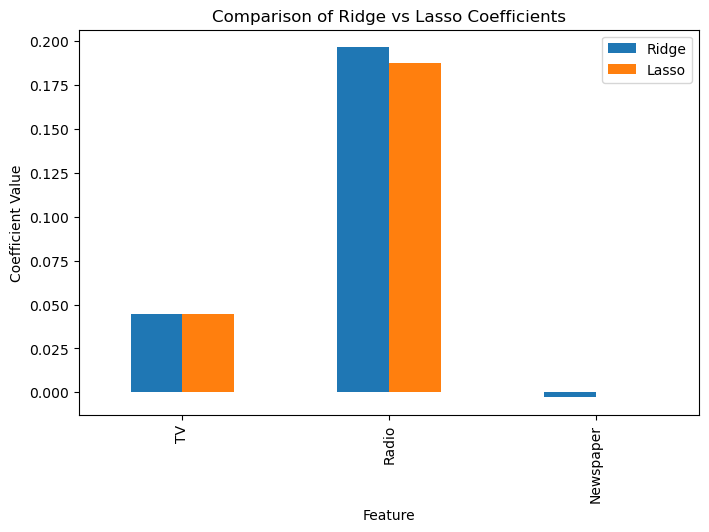

In [8]:
# Optional: visualize coefficients
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Ridge': ridge_cv.coef_,
    'Lasso': lasso_cv.coef_
})
coef_df.plot(x='Feature', kind='bar', figsize=(8,5))
plt.title('Comparison of Ridge vs Lasso Coefficients')
plt.ylabel('Coefficient Value')
plt.show()